In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
faysalmiah1721758_potato_dataset_path = kagglehub.dataset_download('faysalmiah1721758/potato-dataset')

print('Data source import complete.')


100%|██████████| 37.8M/37.8M [00:00<00:00, 115MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Multi-Class Classification Model Using Potato Plant Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faysalmiah1721758/potato-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/faysalmiah1721758/potato-dataset/versions/1


In [4]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("faysalmiah1721758/potato-dataset")

In [10]:
class_names = os.listdir(dataset_path)
print("Total Classes:", len(class_names))
print("Disease Categories:", class_names)

Total Classes: 3
Disease Categories: ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']


In [11]:
class_count = {
    class_name: len(os.listdir(os.path.join(dataset_path, class_name)))
    for class_name in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, class_name))
}

print(class_count)

{'Potato___healthy': 152, 'Potato___Late_blight': 1000, 'Potato___Early_blight': 1000}


/tmp/ipython-input-1177674594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_count.keys()), y=list(class_count.values()), palette="viridis")


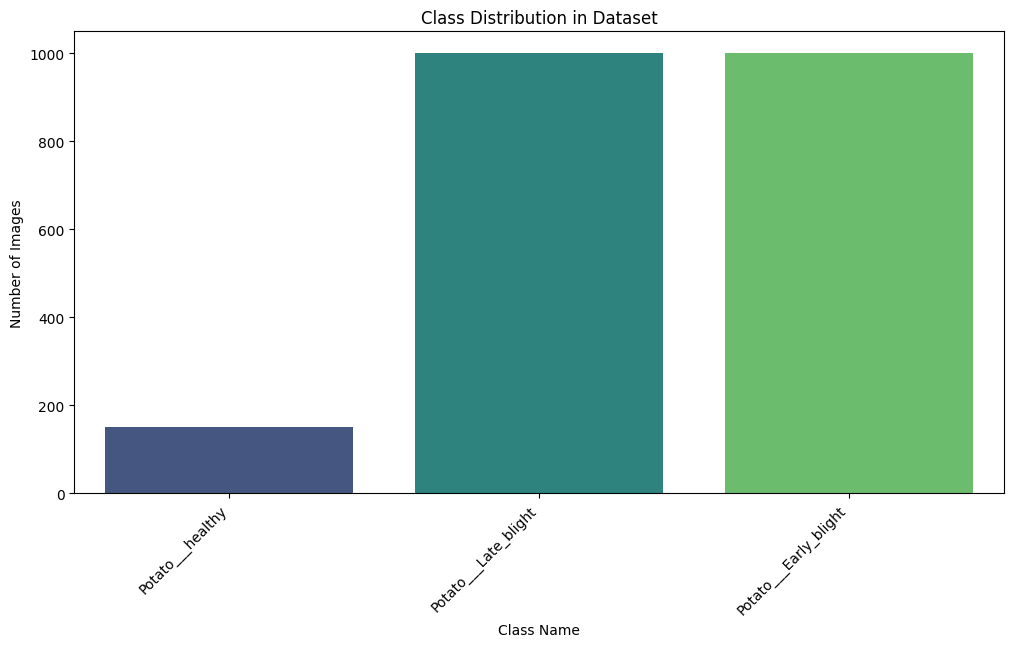

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(class_count.keys()), y=list(class_count.values()), palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.show()

In [13]:
categories = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]


In [14]:
data=[]
labels=[]
img_size = 128

for category in categories:
    path= os.path.join(dataset_path,category)
    label = categories.index(category) # convert class name to number(0,1,2)

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert to rgb
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image{img_name}: {e}")

In [15]:
data = np.array(data)/255.0
labels = np.array(labels)

print("Dataset shape:", data.shape)
print("Labels shape:", labels.shape)

Dataset shape: (2152, 128, 128, 3)
Labels shape: (2152,)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training samples:", {len(X_train)})
print(f"Testing Samples", {len(X_test)})

Training samples: {1721}
Testing Samples {431}


In [17]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.5316 - loss: 0.9088 - val_accuracy: 0.8097 - val_loss: 0.4835
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8458 - loss: 0.4501 - val_accuracy: 0.8956 - val_loss: 0.2700
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8513 - loss: 0.3713 - val_accuracy: 0.8817 - val_loss: 0.3083
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9099 - loss: 0.2421 - val_accuracy: 0.9559 - val_loss: 0.1307
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9269 - loss: 0.1844 - val_accuracy: 0.9466 - val_loss: 0.1487
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9367 - loss: 0.1762 - val_accuracy: 0.9698 - val_loss: 0.0984
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9422 - loss: 0.1434 - val_accuracy: 0.9745 - val_loss: 0.1019
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9597 - loss: 0.1194 - val_accuracy: 0.9814 -

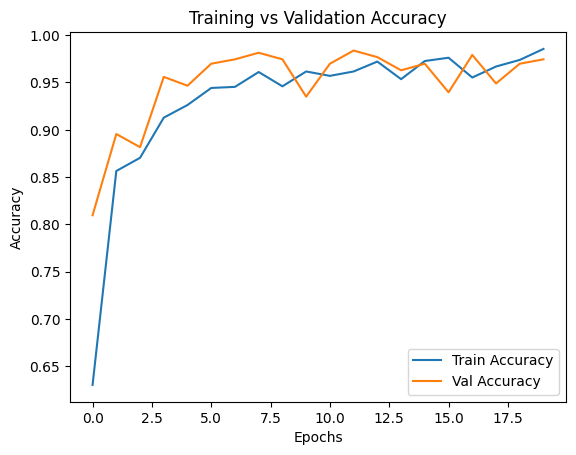

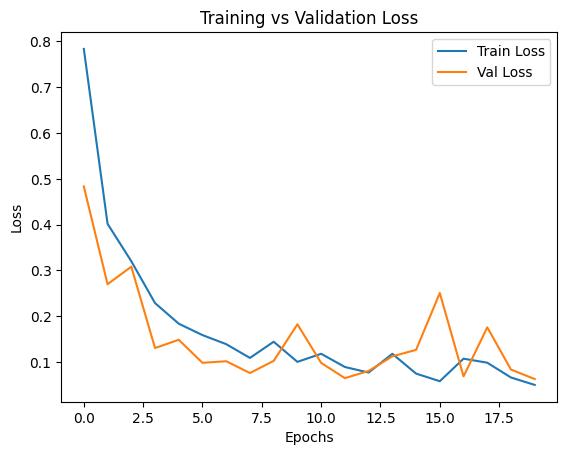

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9796 - loss: 0.0430
Test Accuracy: 97.45%


In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [20]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, 128, 128, 3)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (1721, 128, 128, 3)
y_train shape: (1721,)


In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Use `.flow()` instead of `flow_from_directory()`
train_generator = train_datagen.flow(
    X_train,  # Your image data (NumPy array)
    y_train,  # Your labels (NumPy array)
    batch_size=32
)

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow(
    X_test,  # Validation images
    y_test,  # Validation labels
    batch_size=32
)


In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"X_train min pixel value: {X_train.min()}, max pixel value: {X_train.max()}")
print(f"Data type: {X_train.dtype}")


X_train shape: (1721, 128, 128, 3)
X_train min pixel value: 0.0, max pixel value: 1.0
Data type: float64


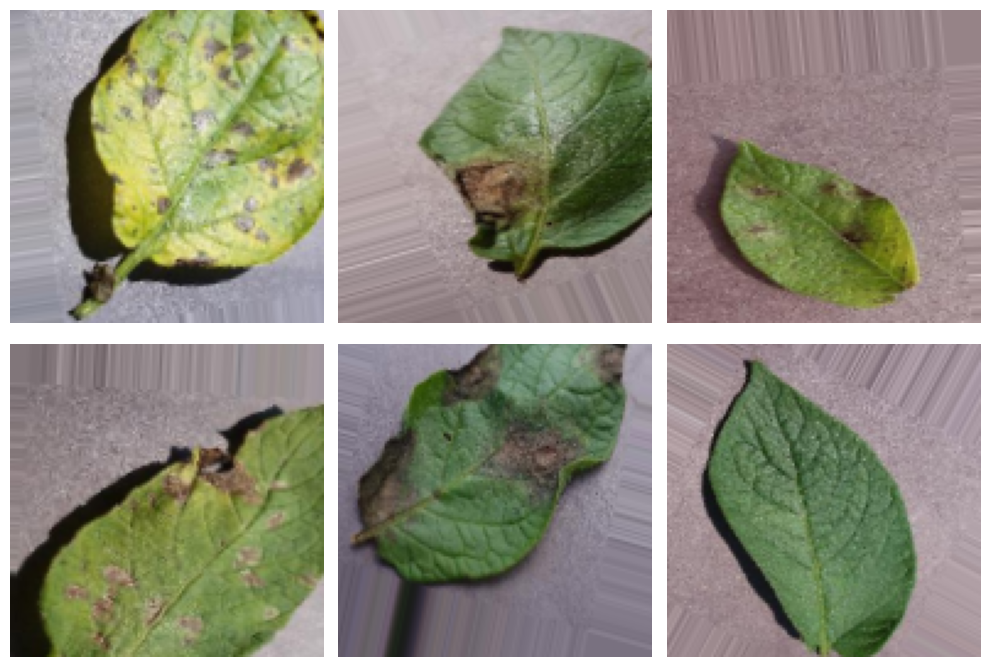

In [23]:
import matplotlib.pyplot as plt
import cv2

# Get a batch of images
augmented_images, augmented_labels = next(train_generator)

# Plot the first 6 augmented images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.flatten()

for img, ax in zip(augmented_images[:20], axes):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [24]:
from collections import Counter

# Assuming y_train contains class labels
class_counts = Counter(y_train)

print("Class Counts Before Augmentation:", class_counts)


Class Counts Before Augmentation: Counter({np.int64(0): 800, np.int64(1): 800, np.int64(2): 121})


Class Counts: [800, 800, 121]


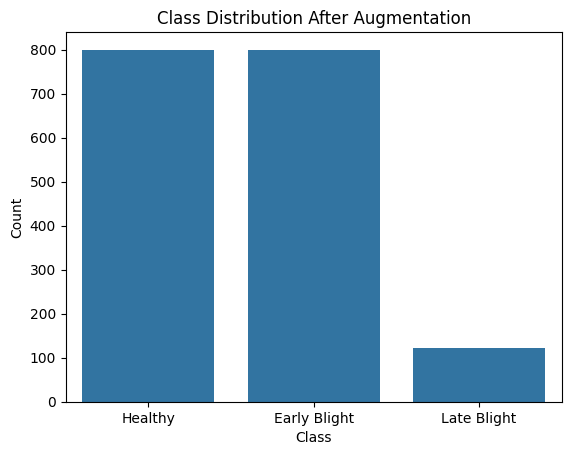

In [25]:
from collections import Counter

# Assuming y_train contains class labels (0, 1, 2)
class_counts = Counter(y_train)

# Convert to list in correct order (0=Healthy, 1=Early Blight, 2=Late Blight)
class_counts = [class_counts.get(i, 0) for i in range(3)]

print("Class Counts:", class_counts)  # Should print something like: [100, 150, 200]

sns.barplot(x=["Healthy", "Early Blight", "Late Blight"], y=class_counts)
plt.title("Class Distribution After Augmentation")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define augmentation
augmenter = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Get images of the minority class (Late Blight)
late_blight_images = X_train[np.where(y_train == 2)]  # Extract Late Blight samples
target_count = 800  # Match with other classes
augmented_images = []

# Augment Late Blight images
for img in late_blight_images:
    img = np.expand_dims(img, axis=0)
    for _ in range((target_count // len(late_blight_images)) - 1):
        augmented_images.append(augmenter.flow(img, batch_size=1)[0][0])

# Convert to numpy array and add to dataset
augmented_images = np.array(augmented_images)
X_train = np.concatenate((X_train, augmented_images), axis=0)
y_train = np.concatenate((y_train, np.full(len(augmented_images), 2)), axis=0)

# Check new class counts
from collections import Counter
print("Class Counts After Augmentation:", Counter(y_train))


Class Counts After Augmentation: Counter({np.int64(0): 800, np.int64(1): 800, np.int64(2): 726})


Class Counts: [800, 800, 726]


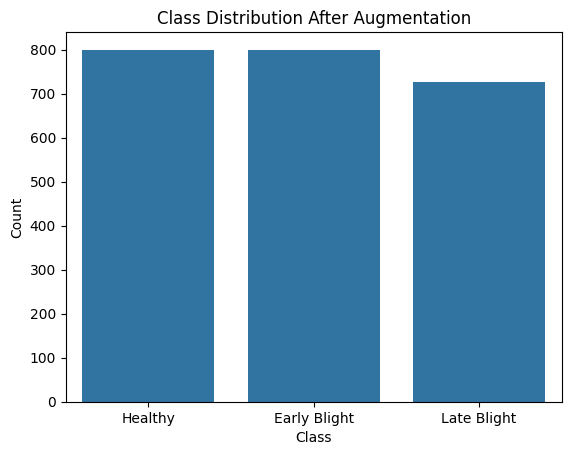

In [27]:
from collections import Counter

# Assuming y_train contains class labels (0, 1, 2)
class_counts = Counter(y_train)

# Convert to list in correct order (0=Healthy, 1=Early Blight, 2=Late Blight)
class_counts = [class_counts.get(i, 0) for i in range(3)]

print("Class Counts:", class_counts)  # Should print something like: [100, 150, 200]

sns.barplot(x=["Healthy", "Early Blight", "Late Blight"], y=class_counts)
plt.title("Class Distribution After Augmentation")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [28]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.4676 - loss: 1.0020 - val_accuracy: 0.7703 - val_loss: 0.4929
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7476 - loss: 0.5526 - val_accuracy: 0.7935 - val_loss: 0.4473
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8239 - loss: 0.4279 - val_accuracy: 0.9165 - val_loss: 0.2674
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8776 - loss: 0.2881 - val_accuracy: 0.9350 - val_loss: 0.1945
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9161 - loss: 0.2361 - val_accuracy: 0.9768 - val_loss: 0.0754
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9490 - loss: 0.1383 - val_accuracy: 0.9582 - val_loss: 0.1196
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9447 - loss: 0.1561 - val_accuracy: 0.9211 - val_loss: 0.1666
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9489 - loss: 0.1194 - val_accuracy: 0.9745 - v

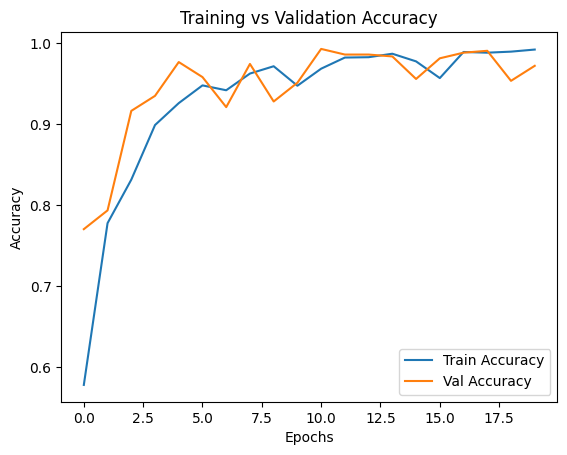

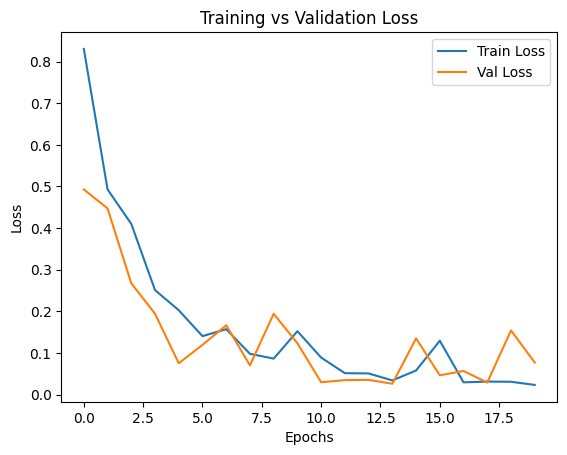

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9773 - loss: 0.0603
Test Accuracy: 97.22%


In [30]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)  # Convert to class labels
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
[[200   0   0]
 [  7 188   5]
 [  0   0  31]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       200
           1       1.00      0.94      0.97       200
           2       0.86      1.00      0.93        31

    accuracy                           0.97       431
   macro avg       0.94      0.98      0.96       431
weighted avg       0.97      0.97      0.97       431



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)  # Convert to class labels
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load MobileNetV2 without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom classifier
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Avoid overfitting
    layers.Dense(3, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model using Ranger
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.7679 - loss: 0.5612 - val_accuracy: 0.9745 - val_loss: 0.0942
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9661 - loss: 0.0865 - val_accuracy: 0.9814 - val_loss: 0.0707
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9905 - loss: 0.0399 - val_accuracy: 0.9768 - val_loss: 0.0643
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9893 - loss: 0.0354 - val_accuracy: 0.9861 - val_loss: 0.0597
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.9814 - val_loss: 0.0599
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9861 - val_loss: 0.0599
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9980 - loss: 0.0126 - val_accuracy: 0.9838 - val_loss: 0.0544
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9996 - loss: 0.0097 - val_accuracy: 0.9698 -

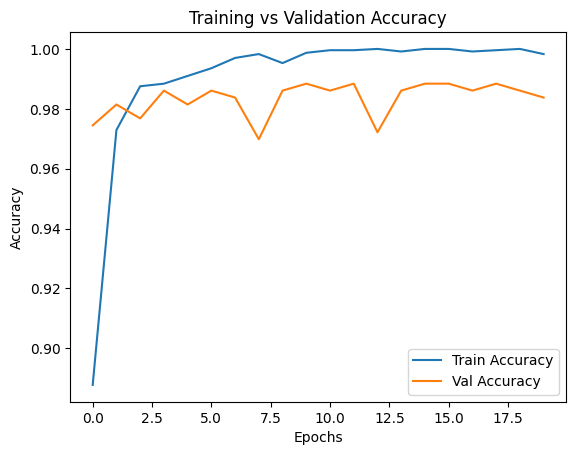

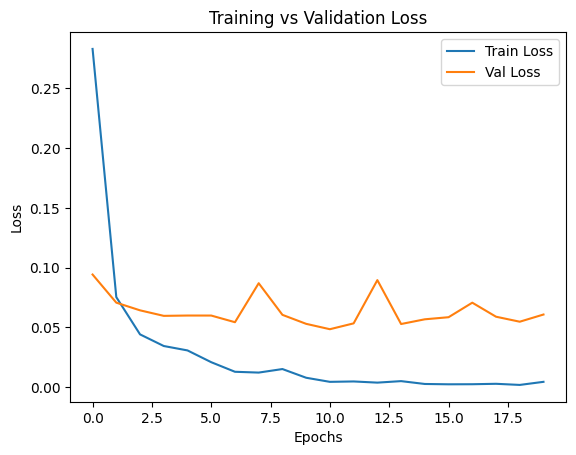

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9841 - loss: 0.0587
Test Accuracy: 98.38%


In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [ ]:
model.save("my_model")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=my_model.

In [32]:
!pip freeze > requirements.txt

You can download the `my_model.h5` file and the `requirements.txt` file from the file explorer on the left sidebar. The preprocessing steps for the image are included in the notebook, specifically in the cells where the data is loaded, resized, and augmented.

In [ ]:
# Preprocessing steps for a single image:

def preprocess_image(image_path, img_size=128):
    """Loads, resizes, and normalizes an image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0) # Add batch dimension
    return img

# Example usage:
# preprocessed_image = preprocess_image("path/to/your/image.jpg")
# prediction = model.predict(preprocessed_image)
# predicted_class = categories[np.argmax(prediction)]
# print(f"Predicted class: {predicted_class}")

In [33]:
model.save("my_model.h5")

In [34]:
model.save("my_model.keras")

In [ ]:
# Preprocessing steps for a single image:

def preprocess_image(image_path, img_size=128):
    """Loads, resizes, and normalizes an image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0) # Add batch dimension
    return img

# Example usage:
# preprocessed_image = preprocess_image("path/to/your/image.jpg")
# prediction = model.predict(preprocessed_image)
# predicted_class = categories[np.argmax(prediction)]
# print(f"Predicted class: {predicted_class}")

In [ ]:
import os
print(os.listdir())


In [35]:
print("hellow owrld")

hellow owrld
